In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Loan prediction.csv")

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
s=data.drop(["Loan_ID","Gender","Married","Dependents","Education","Self_Employed"],axis=1)

In [6]:
s

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,Rural,N
2,3000,0.0,66.0,360.0,1.0,Urban,Y
3,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Rural,Y
610,4106,0.0,40.0,180.0,1.0,Rural,Y
611,8072,240.0,253.0,360.0,1.0,Urban,Y
612,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
s.groupby(["LoanAmount"]).count()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LoanAmount,,,,,,
9.0,1,1,1,1,1,1
17.0,1,1,1,1,1,1
25.0,2,2,2,2,2,2
26.0,1,1,1,1,1,1
30.0,2,2,2,2,2,2
...,...,...,...,...,...,...
500.0,1,1,1,1,1,1
570.0,1,1,1,1,1,1
600.0,2,2,2,2,2,2


In [8]:
s["LoanAmount"]=s["LoanAmount"].fillna(115)

In [9]:
s["Loan_Amount_Term"]=s["Loan_Amount_Term"].fillna(180)

In [10]:
s["Credit_History"]=s["Credit_History"].fillna(0)

In [11]:
s.groupby(["Loan_Status"]).count()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,
N,192,192,192,192,192,192
Y,422,422,422,422,422,422


In [12]:
s["Loan_Status"]=s["Loan_Status"].map({"Y":1,"N":0})

In [13]:
s

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,5849,0.0,115.0,360.0,1.0,Urban,1
1,4583,1508.0,128.0,360.0,1.0,Rural,0
2,3000,0.0,66.0,360.0,1.0,Urban,1
3,2583,2358.0,120.0,360.0,1.0,Urban,1
4,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Rural,1
610,4106,0.0,40.0,180.0,1.0,Rural,1
611,8072,240.0,253.0,360.0,1.0,Urban,1
612,7583,0.0,187.0,360.0,1.0,Urban,1


In [14]:
s1=pd.get_dummies(s)

In [15]:
s1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,115.0,360.0,1.0,1,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,0,0,1


In [16]:
s1.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [17]:
y=s1["Loan_Status"]

In [18]:
x=s1.drop("Loan_Status",axis=1)

In [19]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,115.0,360.0,1.0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,0,1


In [20]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=32)

In [23]:
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
51,3086,0.0,120.0,360.0,1.0,0,1,0
19,2600,3500.0,115.0,180.0,1.0,0,0,1
494,3597,2157.0,119.0,360.0,0.0,1,0,0
612,7583,0.0,187.0,360.0,1.0,0,0,1
188,674,5296.0,168.0,360.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...
378,3069,0.0,71.0,480.0,1.0,0,0,1
479,2947,1603.0,115.0,360.0,1.0,0,0,1
44,4695,0.0,96.0,180.0,1.0,0,0,1
461,7740,0.0,128.0,180.0,1.0,0,0,1


In [24]:
y_test

51     1
19     1
494    0
612    1
188    1
      ..
378    0
479    0
44     1
461    1
63     0
Name: Loan_Status, Length: 123, dtype: int64

In [25]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
277,3103,1300.0,80.0,360.0,1.0,0,0,1
582,3166,0.0,36.0,360.0,1.0,0,1,0
144,11757,0.0,187.0,180.0,1.0,0,0,1
348,6333,4583.0,259.0,360.0,0.0,0,1,0
112,3572,4114.0,152.0,180.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...
252,2583,2167.0,104.0,360.0,1.0,1,0,0
403,1963,0.0,53.0,360.0,1.0,0,1,0
88,8566,0.0,210.0,360.0,1.0,0,0,1
310,2917,0.0,84.0,360.0,1.0,0,1,0


In [26]:
y_train

277    1
582    1
144    1
348    1
112    0
      ..
252    1
403    1
88     1
310    1
555    1
Name: Loan_Status, Length: 491, dtype: int64

In [27]:
core=s1.corr()

In [28]:
core

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.116605,0.564308,-0.031145,0.006986,-0.004710,0.015829,-0.014246,-0.000598
CoapplicantIncome,-0.116605,1.000000,0.190008,-0.057884,-0.058795,-0.059187,0.005329,-0.027044,0.022776
LoanAmount,0.564308,0.190008,1.000000,0.055542,-0.034407,-0.030926,0.043627,-0.004059,-0.038007
Loan_Amount_Term,-0.031145,-0.057884,0.055542,1.000000,0.031068,-0.006197,0.032918,0.075739,-0.110064
Credit_History,0.006986,-0.058795,-0.034407,0.031068,1.000000,0.432616,-0.012650,0.054115,-0.043655
Loan_Status,-0.004710,-0.059187,-0.030926,-0.006197,0.432616,1.000000,-0.100694,0.136540,-0.043621
Property_Area_Rural,0.015829,0.005329,0.043627,0.032918,-0.012650,-0.100694,1.000000,-0.501646,-0.449168
Property_Area_Semiurban,-0.014246,-0.027044,-0.004059,0.075739,0.054115,0.136540,-0.501646,1.000000,-0.547574
Property_Area_Urban,-0.000598,0.022776,-0.038007,-0.110064,-0.043655,-0.043621,-0.449168,-0.547574,1.000000


In [29]:
import seaborn as sns

<Axes: >

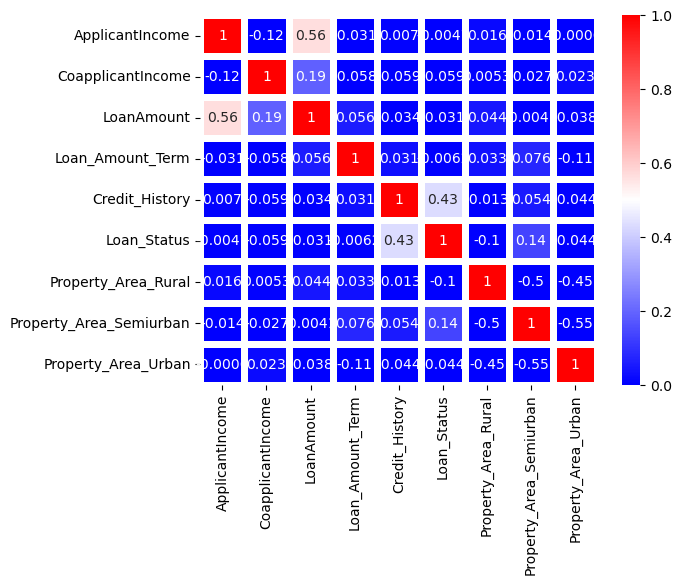

In [32]:
sns.heatmap(core,vmax=1,vmin=0,annot=True,linewidth=5,cmap="bwr")

In [31]:
from sklearn.linear_model import LogisticRegression


In [32]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [33]:
ypred=reg.predict(x_test)

In [34]:
ypred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,ypred)

array([[14, 27],
       [ 5, 77]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,ypred)

0.7398373983739838

In [39]:
results=pd.DataFrame(columns=["original","predicted"])

In [40]:
results["original"]=y_test

In [41]:
results["predicted"]=ypred

In [42]:
results

,original,predicted
51,1,1
19,1,1
494,0,0
612,1,1
188,1,1
...,...,...
378,0,1
479,0,1
44,1,1
461,1,1


In [43]:
results=results.reset_index()

In [44]:
results

,index,original,predicted
0,51,1,1
1,19,1,1
2,494,0,0
3,612,1,1
4,188,1,1
...,...,...,...
118,378,0,1
119,479,0,1
120,44,1,1
121,461,1,1


In [45]:
results['id']=results.index

In [46]:
results.head(10)

,index,original,predicted,id
0,51,1,1,0
1,19,1,1,1
2,494,0,0,2
3,612,1,1,3
4,188,1,1,4
5,237,1,0,5
6,300,0,0,6
7,193,1,1,7
8,195,0,1,8
9,365,0,1,9


[]

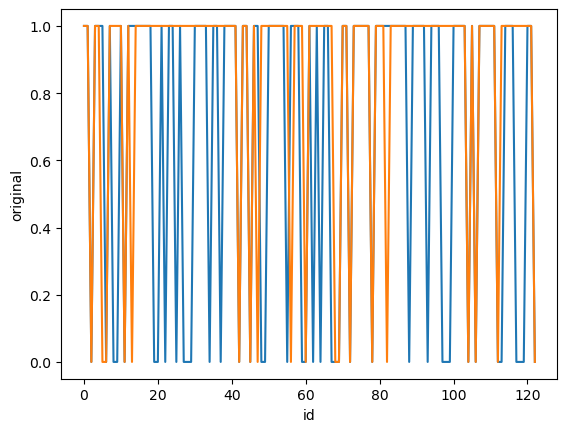

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='id',y='original',data=results.head(500))
sns.lineplot(x='id',y='predicted',data=results.head(500))
plt.plot()

In [60]:
new=[[3103,1300,80,360,1.0,1,1,0]]

In [61]:
real=reg.predict(new)

C:\Users\shibh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [62]:
real

array([1], dtype=int64)